In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,Unnamed: 0,id,total_sold,avg_sold_price,max_sold_price,types,rarity,skin,traits,total_traits,marcador
0,0,0,3.0,9.193333,25.00,Female,2023,Mid,"Blonde Bob,Earring,Green Eye Shadow",3,1
1,1,1,3.0,30.473333,60.00,Male,4352,Dark,"Mohawk,Smile",2,1
2,14,14,3.0,1.750000,2.50,Female,155,Dark,"Hot Lipstick,Pilot Helmet,Pipe",3,1
3,33,33,1.0,0.510000,0.51,Male,7635,Light,Peak Spike,1,1
4,53,53,2.0,21.000000,22.00,Female,2825,Light,"Big Shades,Straight Hair",2,1


In [3]:
df.shape

(5615, 11)

In [4]:
df.drop(['Unnamed: 0','max_sold_price','traits','marcador'],axis=1,inplace=True)
df['types'] = df.types.map({'Male':1,'Female':1,'Ape':0,'Zombie':0,'Alien':0})
df['skin'] = df.skin.map({'Mid':4,'Dark':3,'Light':2,'Albino':1,'Ape':0,'Zombie':0,'Alien':0})
df.total_sold = df['total_sold'].astype(int)
df.drop('id',axis=1,inplace=True)
df.head()

,total_sold,avg_sold_price,types,rarity,skin,total_traits
0,3,9.193333,1,2023,4,3
1,3,30.473333,1,4352,3,2
2,3,1.750000,1,155,3,3
3,1,0.510000,1,7635,2,1
4,2,21.000000,1,2825,2,2


In [5]:
df.total_sold.unique()

array([ 3,  1,  2,  4,  5,  8,  6,  9,  7, 11, 10, 15, 13, 12, 14])

df1=pd.read_csv('df_to_model.csv')
df1.drop('Unnamed: 0',axis=1,inplace=True)
df1.dropna(inplace=True)
df1

In [6]:
df.isnull().sum()

total_sold        0
avg_sold_price    0
types             0
rarity            0
skin              0
total_traits      0
dtype: int64

In [7]:
X = df.drop(['avg_sold_price'],axis=1)
y = df['avg_sold_price']

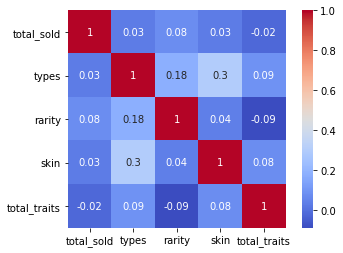

In [8]:
correlation_matrix = X.corr().round(2)
sns.heatmap(data=correlation_matrix, square=True,cmap='coolwarm',annot=True)
plt.show()
#cmap='RdYlGn'

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model = DecisionTreeRegressor()

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [13]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [14]:
model.score(X_test,y_test)

-5.3410894697387645

In [15]:
y_pred = model.predict(X_test)

In [16]:
X_test

,total_sold,types,rarity,skin,total_traits
2421,4,1,6027,2,3
3343,1,1,8482,2,3
469,2,1,8129,4,3
4101,10,1,5269,4,3
4736,4,1,9304,3,2
...,...,...,...,...,...
3208,1,1,8862,3,3
2250,2,1,8655,3,3
5137,1,1,1952,4,3
5010,1,1,9900,4,3


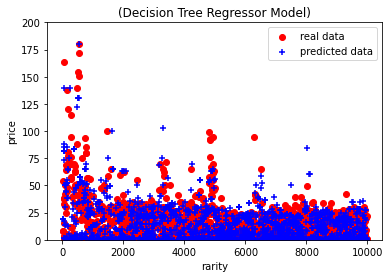

In [17]:
plt.scatter(X_test.rarity, y_test, color = 'red')
plt.scatter(X_test.rarity, y_pred, color = 'blue',marker='+')
plt.title('(Decision Tree Regressor Model)')
plt.xlabel('rarity')
plt.ylabel('price')
plt.ylim([0,200])
plt.legend(['real data','predicted data'])
plt.show()

In [18]:
explanatory_data = pd.DataFrame({"y_test": y_test})

In [19]:
prediction_data = explanatory_data.assign(y_pred =y_pred)

In [20]:
prediction_data

,y_test,y_pred
2421,5.5575,5.9120
3343,6.5000,24.9900
469,14.8750,0.0900
4101,13.1450,4.0030
4736,13.2150,14.2275
...,...,...
3208,0.2500,17.0000
2250,3.8050,0.3400
5137,18.0000,4.9300
5010,0.1000,0.1500


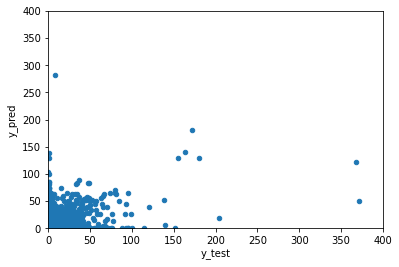

In [21]:
prediction_data.plot(x='y_test',y='y_pred',kind='scatter')
plt.xlim(0,400)
plt.ylim(0,400)
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
X_new = sc.fit_transform(X)
X_new

array([[ 0.24950513,  0.10822066, -1.10563859,  1.18898773,  0.26306239],
       [ 0.24950513,  0.10822066, -0.29011572,  0.20993419, -1.00919888],
       [ 0.24950513,  0.10822066, -1.75973766,  0.20993419,  0.26306239],
       ...,
       [ 0.24950513,  0.10822066, -1.06502002, -0.76911935, -1.00919888],
       [ 0.24950513,  0.10822066,  0.83459852, -0.76911935,  1.53532367],
       [-0.27072186,  0.10822066, -1.40817692,  1.18898773,  1.53532367]])

In [25]:
X_new = pd.DataFrame(X_new)

In [26]:
X_new.columns = ['total_sold','types','rarity','skin','total_traits']

In [27]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_new,y,test_size=0.3)
model.fit(X_train1,y_train1)
y_pred1 = model.predict(X_test1)

In [28]:
X_test.head()

,total_sold,types,rarity,skin,total_traits
2421,4,1,6027,2,3
3343,1,1,8482,2,3
469,2,1,8129,4,3
4101,10,1,5269,4,3
4736,4,1,9304,3,2


In [29]:
explanatory_data1 = pd.DataFrame({"y_test": y_test1})
prediction_data1 = explanatory_data1.assign(y_pred =y_pred1)

(0.0, 200.0)

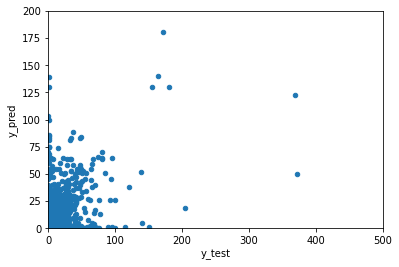

In [30]:
prediction_data.plot(x='y_test',y='y_pred',kind='scatter')
plt.xlim([0,500])
plt.ylim([0,200])

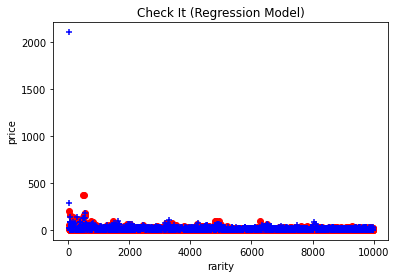

In [31]:
plt.scatter(X_test.rarity, y_test, color = 'red')
plt.scatter(X_test.rarity, y_pred, color = 'blue',marker='+')
plt.title('Check It (Regression Model)')
plt.xlabel('rarity')
plt.ylabel('price')
plt.show()